# Importo le librerie necessarie

In [1]:
import DS_functions as df
from DS_functions import steam as steam

# A BRIEF INTRODUCTION
Steam is one of the biggest platforms that provide multiple services in video games field all over the world and for this reason their data could be very powerfull in videgame develpoment.
In this homework we are going to carry out some preliminary analyses on a data frame from Steam containing reviews of multiple video games; the goal is to search for significant pattern in data in order to do more complex analysis.

# [**RQ1**] Exploratory Data Analysis (EDA)

The first thing to do when we work with a new database is to compute an Exploratory Data  Analysis. So what we are going to do is showing the main characteristics of this dataframe using some summary statistics.

After uploading the dataset and coding all the variables in the correct way - see **DS_functions.py** for more details - let's plot the first three rows of our dataset.

In [2]:
steam.head(3)

,app_id,app_name,review_id,language,review,timestamp_created,timestamp_updated,recommended,votes_helpful,votes_funny,...,steam_purchase,received_for_free,written_during_early_access,author.steamid,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review,author.last_played
0,292030,The Witcher 3: Wild Hunt,85185598,schinese,不玩此生遗憾，RPG游戏里的天花板，太吸引人了,2021-01-23 06:00:29,2021-01-23 06:00:29,True,0,0,...,True,False,False,76561199095369542,6,2,1 days 07:49:00,1 days 00:08:00,1 days 07:49:00,2021-01-22 19:23:03
1,292030,The Witcher 3: Wild Hunt,85185250,schinese,拔DIAO无情打桩机--杰洛特!!!,2021-01-23 05:50:30,2021-01-23 05:50:30,True,0,0,...,True,False,False,76561198949504115,30,10,1 days 22:04:00,1 days 21:43:00,1 days 20:34:00,2021-01-23 07:18:27
2,292030,The Witcher 3: Wild Hunt,85185111,schinese,巫师3NB,2021-01-23 05:46:40,2021-01-23 05:46:40,True,0,0,...,True,False,False,76561199090098988,5,1,0 days 17:41:00,0 days 17:41:00,0 days 17:40:00,2021-01-23 06:36:17


  
The data frame is composed by 21747371 reviews (rows) on which were observed 22 variables (columns).

In [2]:
steam.info(null_counts=True)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 21747371 entries, 0 to 21747375
Data columns (total 22 columns):
 #   Column                          Non-Null Count     Dtype          
---  ------                          --------------     -----          
 0   app_id                          21747371 non-null  int64          
 1   app_name                        21747371 non-null  object         
 2   review_id                       21747371 non-null  int64          
 3   language                        21747371 non-null  object         
 4   review                          21713629 non-null  object         
 5   timestamp_created               21747371 non-null  datetime64[ns] 
 6   timestamp_updated               21747371 non-null  datetime64[ns] 
 7   recommended                     21747371 non-null  bool           
 8   votes_helpful                   21747371 non-null  int64          
 9   votes_funny                     21747371 non-null  int64          
 10  weighted_vote_sc

  
All the columns are shown in this output and each of them stand for a particular characteristic of the review:
- **app_id**, **review_id** and **author.steamid** are unique identification codes respectively for the video game reviewed, the review itself and for the author of the review.
- **app_name** and **language** are categorical (or qualitative) variables representing the name of the  game reviewed and the language used for the review.
- **recommended**, **steam_purchase**, **received_for_free** and **written_during_early_access** are dummy variables representing the presence or the absence of the given aspect in a review.
- **votes_helpful**, **votes_funny**, **weighted_vote_score**, **comment_count**, **author.num_games_owned**, **author.num_reviews**, **author.playtime_forever**, **author.playtime_last_two_weeks** and **author.playtime_at_review** are quantitative variables. The first four are reviews' features, the remaining ones are characteristics observed on the author of the review.
- **timestamp_created**, **timestamp_updated**, **author.last_played**, are the dates of creation and updating of the revision, respectively and the date of the last time that the author plyed at the reviewed game.
- **review**, the content of the review.


Before passing over another important aspect to notice is the presence of null values in our dataframe. Fortunately only few rows and columns are affected by the absence of some values. The first one is **review** with a null rate of 0,2%, probably because the author didn't write anything on his reviews; then **author.playtime_forever**, **author.playtime_last_two_weeks**, **author.last_played** that have only 2 missing values; the last one is **author.playtime_at_review** with a null rate of 0,11%.

The next step is to study the distribution of quantitative variables. Here we can find some statistical indices that are used to undestand the main characteristics of our variables.

In [15]:
df.pd.set_option('float_format', '{:.2f}'.format)
steam.iloc[:,[8,9,10,11,16,17,18,19,20]].describe()

,votes_helpful,votes_funny,weighted_vote_score,comment_count,author.num_games_owned,author.num_reviews,author.playtime_forever,author.playtime_last_two_weeks,author.playtime_at_review
count,21747371.00,21747371.00,21747371.00,21747371.00,21747371.00,21747371.00,21747369,21747369,21721689
mean,404468.86,126791.73,0.17,0.13,1011300.10,404477.48,11 days 04:11:02.981273736,0 days 02:35:32.528105813,6 days 02:47:25.285185696
std,1333740760.95,23335525.90,0.24,2.20,2108829161.08,1333740760.92,25 days 23:50:34.065542731,0 days 12:10:02.928291200,16 days 14:05:31.832565526
min,0.00,0.00,0.00,0.00,0.00,1.00,0 days 00:00:00,0 days 00:00:00,0 days 00:01:00
25%,0.00,0.00,0.00,0.00,22.00,2.00,0 days 20:50:00,0 days 00:00:00,0 days 09:19:00
50%,0.00,0.00,0.00,0.00,61.00,4.00,2 days 23:47:00,0 days 00:00:00,1 days 07:21:00
75%,1.00,0.00,0.48,0.00,145.00,10.00,10 days 08:32:00,0 days 00:00:00,4 days 17:43:00
max,4398046511106.00,4294967295.00,1.00,4893.00,4398046511619.00,4398046511108.00,2600 days 15:43:00,18 days 18:39:00,2241 days 17:43:00


For each variables **.describe()** function shows the count,the mean, the standar deviation, maximum, minimum and the quartiles.
The first thing that we notice is that in all the distribution the value of the mean is always higher than the median (second quartile or 50% quantile), this aspect is called positive skewness. This is probably caused by an high presence of low values in distributions; this suggests that before starting a deeper analysis (like modeling) we need to clean our data to make them more representative for the real distribution that we are going to study.   
Lower values are not the only problem in these distributions, in fact as we can see there is a strong difference between the third quartile (75% quantile) and the maximum. This is caused by the presence of some outlayers that also ifluence the value of the standard deviation (square root of variance), making it higher than its real value (the value that we would have if the sample was representative of its real distribution).

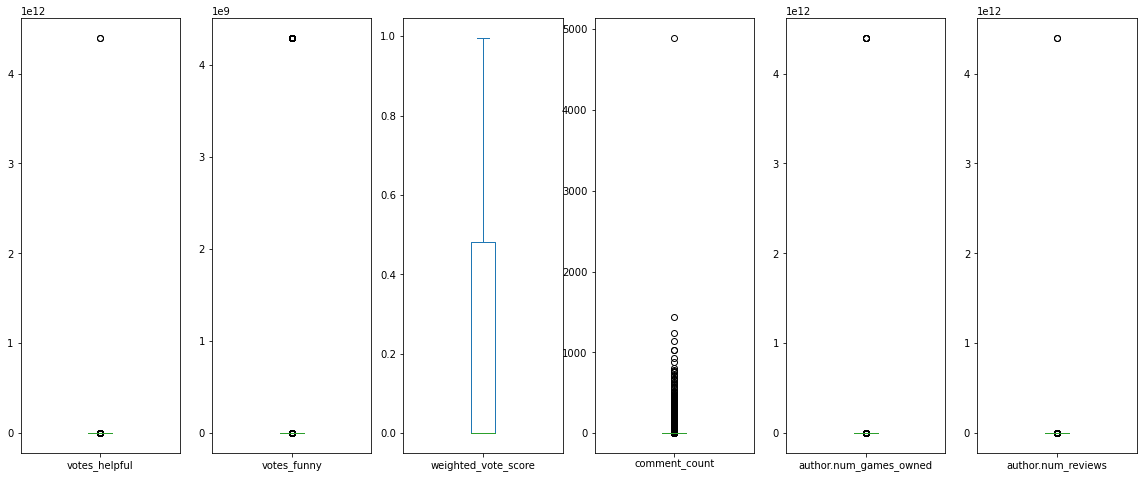

In [16]:
steam.iloc[:,[8,9,10,11,16,17]].plot.box(subplots=True,figsize=(20,8));

This is a grafical representation of the distribution (for NON-timedelta features) called boxplot. Usualy in these plots are shown the quartile representend as horizontal lines at the value of the quartile of the distribution. As we have already said the distribution are biased and for this reason some of the boxplots are collapsed in one line representing all the quartiles. The easiest to read is the **weighted_score**, in fact because it is limited between 0 and 1 there is no presence of outliers and as we can see first and second quartiles are the  same and have value 0, then the third quartile is 0,48 (these are the same information that we can read in the previous output). For all other distributions the outliers are represented by point that were exclued by the boxplot.  
Before moving on, it's important to check also the relationship between quantitative variables. How can we do this?. Correlation is a statistical index between -1 and 1, that not only tells us about a possible pattern in growth between two variables, but also the sign of it (i.e. *given x_1 and x_2 if the correlation between x_1 and x_2 is positive means that for high values of x_1  correspond high values  of x_2; if correlation is negative means that for high value of x_1 correspond low value of x_2 and vice versa; and if the  correlation is zero means that there is no linear correlation between the given variables*).
In order to do so with more than two features we used a correlation matrix.

,review_id
app_name,
The Elder Scrolls V: Skyrim,294966
Stardew Valley,315717
Euro Truck Simulator 2,387553
ARK: Survival Evolved,400009
Dead by Daylight,418897
The Witcher 3: Wild Hunt,469395
Among Us,485293
PAYDAY 2,487747
Rocket League,498565


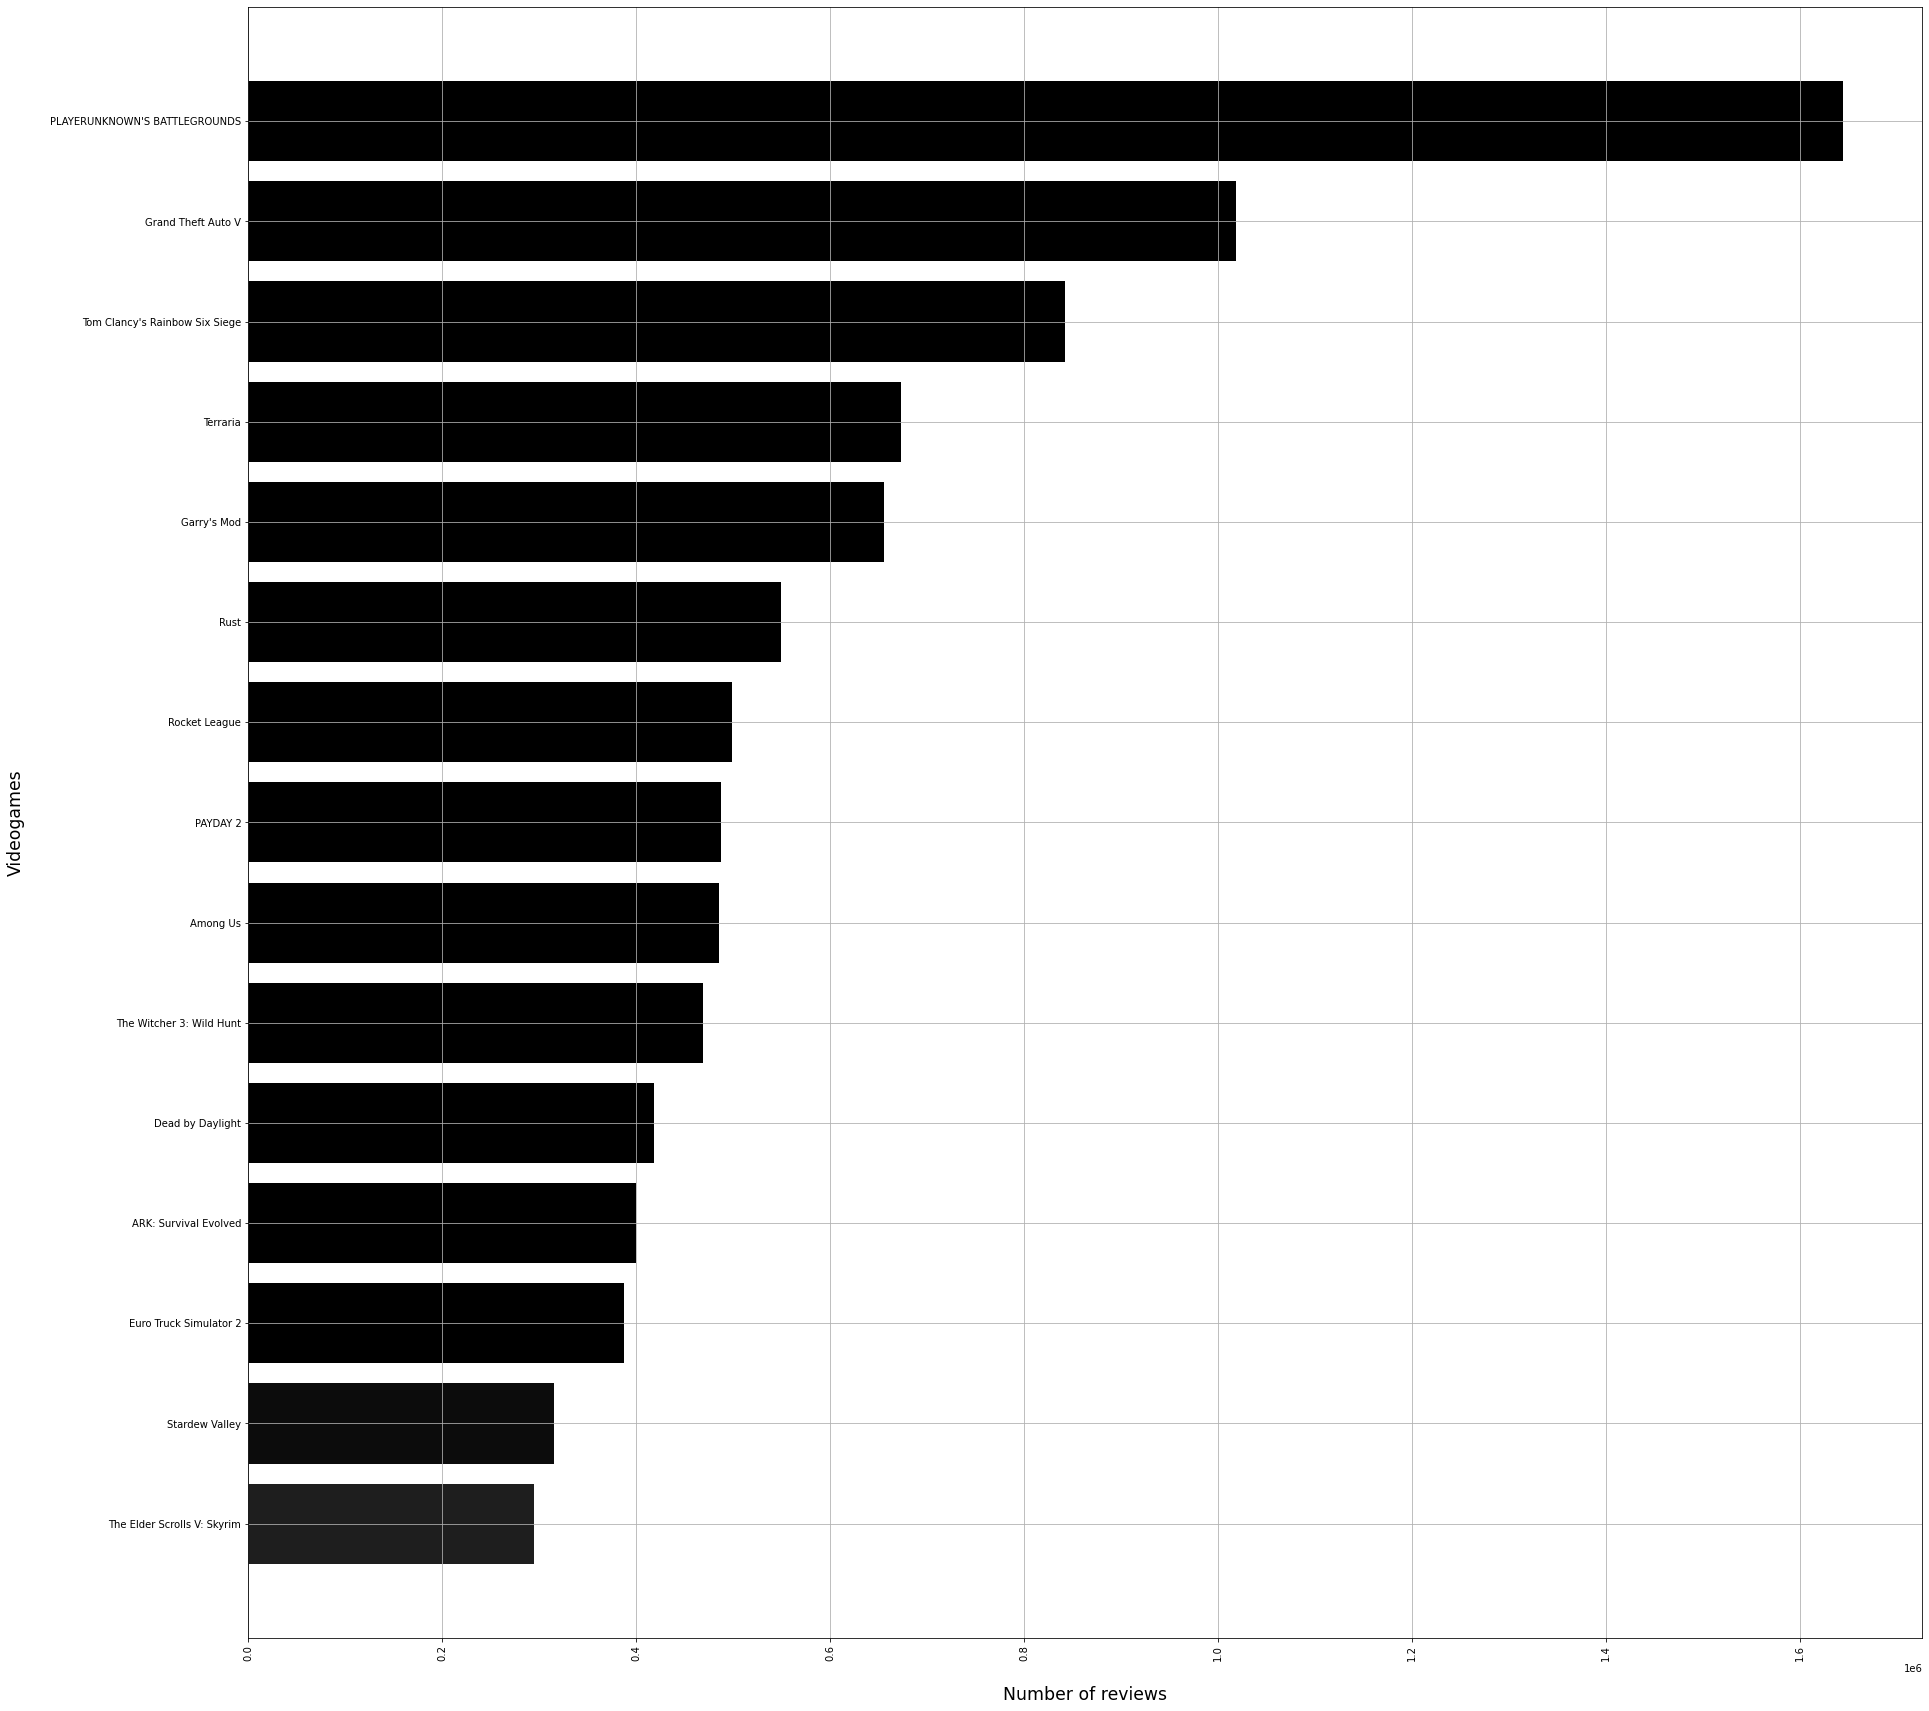

In [7]:
df.numbersOfReviewsByApplication(15)

Numero di review per lingua: come sopra

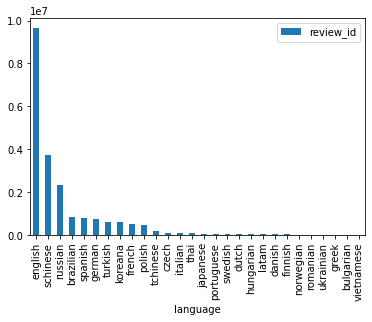

In [8]:
t =steam[["language", "review_id"]].groupby(["language"], as_index = False).count().sort_values("review_id", ascending=False)
t.plot.bar('language','review_id');

Porzione di recensioni in cui il gioco è stato acquistato o non su steam

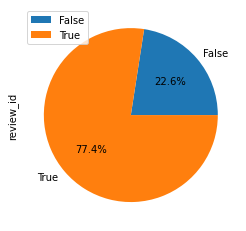

In [9]:
sp=steam[['steam_purchase','review_id']].groupby('steam_purchase').count()
sp.plot.pie(y='review_id',autopct='%1.1f%%');

Porzione di recensione in cui il gioco recensito viene raccomandato e non

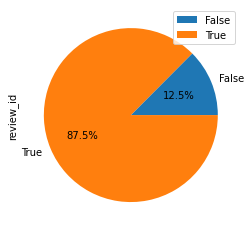

In [10]:
rec=steam[['recommended','review_id']].groupby('recommended').count()
rec.plot.pie(y='review_id',autopct='%1.1f%%');

Porzione di recensioni in cui il gioco recensito viene ricevuto gratis

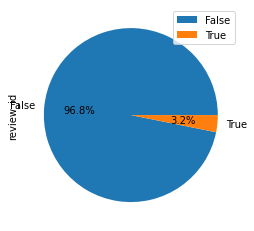

In [11]:
rff=steam[['received_for_free','review_id']].groupby('received_for_free').count()
rff.plot.pie(y='review_id',autopct='%1.1f%%');

porzione di recensioni riferite a giochi in accesso anticipato e non

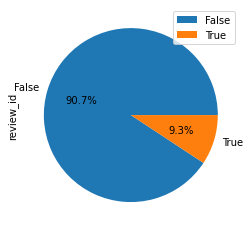

In [12]:
wea=steam[['written_during_early_access','review_id']].groupby('written_during_early_access').count()
wea.plot.pie(y='review_id',autopct='%1.1f%%');

grafico bar con date e numero di recensioni (created update author last played) + grafico RQ3

.

# [**RQ2**] Let's explore the dataset by finding simple insights into the reviews.

  - Plot the number of reviews for each application in descending order.
  
  > In order to answare at this questions, we implemented the function `numbersOfReviewsByApplication(n)` that create a slice of the dataframe with the column `app_name` and `review_id` and than group it by `app_name`. Last but not least, the function sort the result.
  In order to visualize the dataframe, `numbersOfReviewsByApplication()` plot the result also.
  
  
  

.

,review_id
app_name,
Neon Hardcorps,200
DRAGON QUEST HEROES™ II,600
Shadow Complex Remastered,700
Out of the Park Baseball 19,700
Don't Escape: 4 Days to Survive,1013
...,...
Garry's Mod,655524
Terraria,672815
Tom Clancy's Rainbow Six Siege,841918


/home/amedeo/Programmi/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 40857 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amedeo/Programmi/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 23830 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amedeo/Programmi/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 65290 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amedeo/Programmi/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 19977 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amedeo/Programmi/anaconda3/lib/python3.8/site-packages/matplotlib/backends/backend_agg.py:238: RuntimeWarning: Glyph 22269 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/home/amedeo/Programmi/anaconda3/li

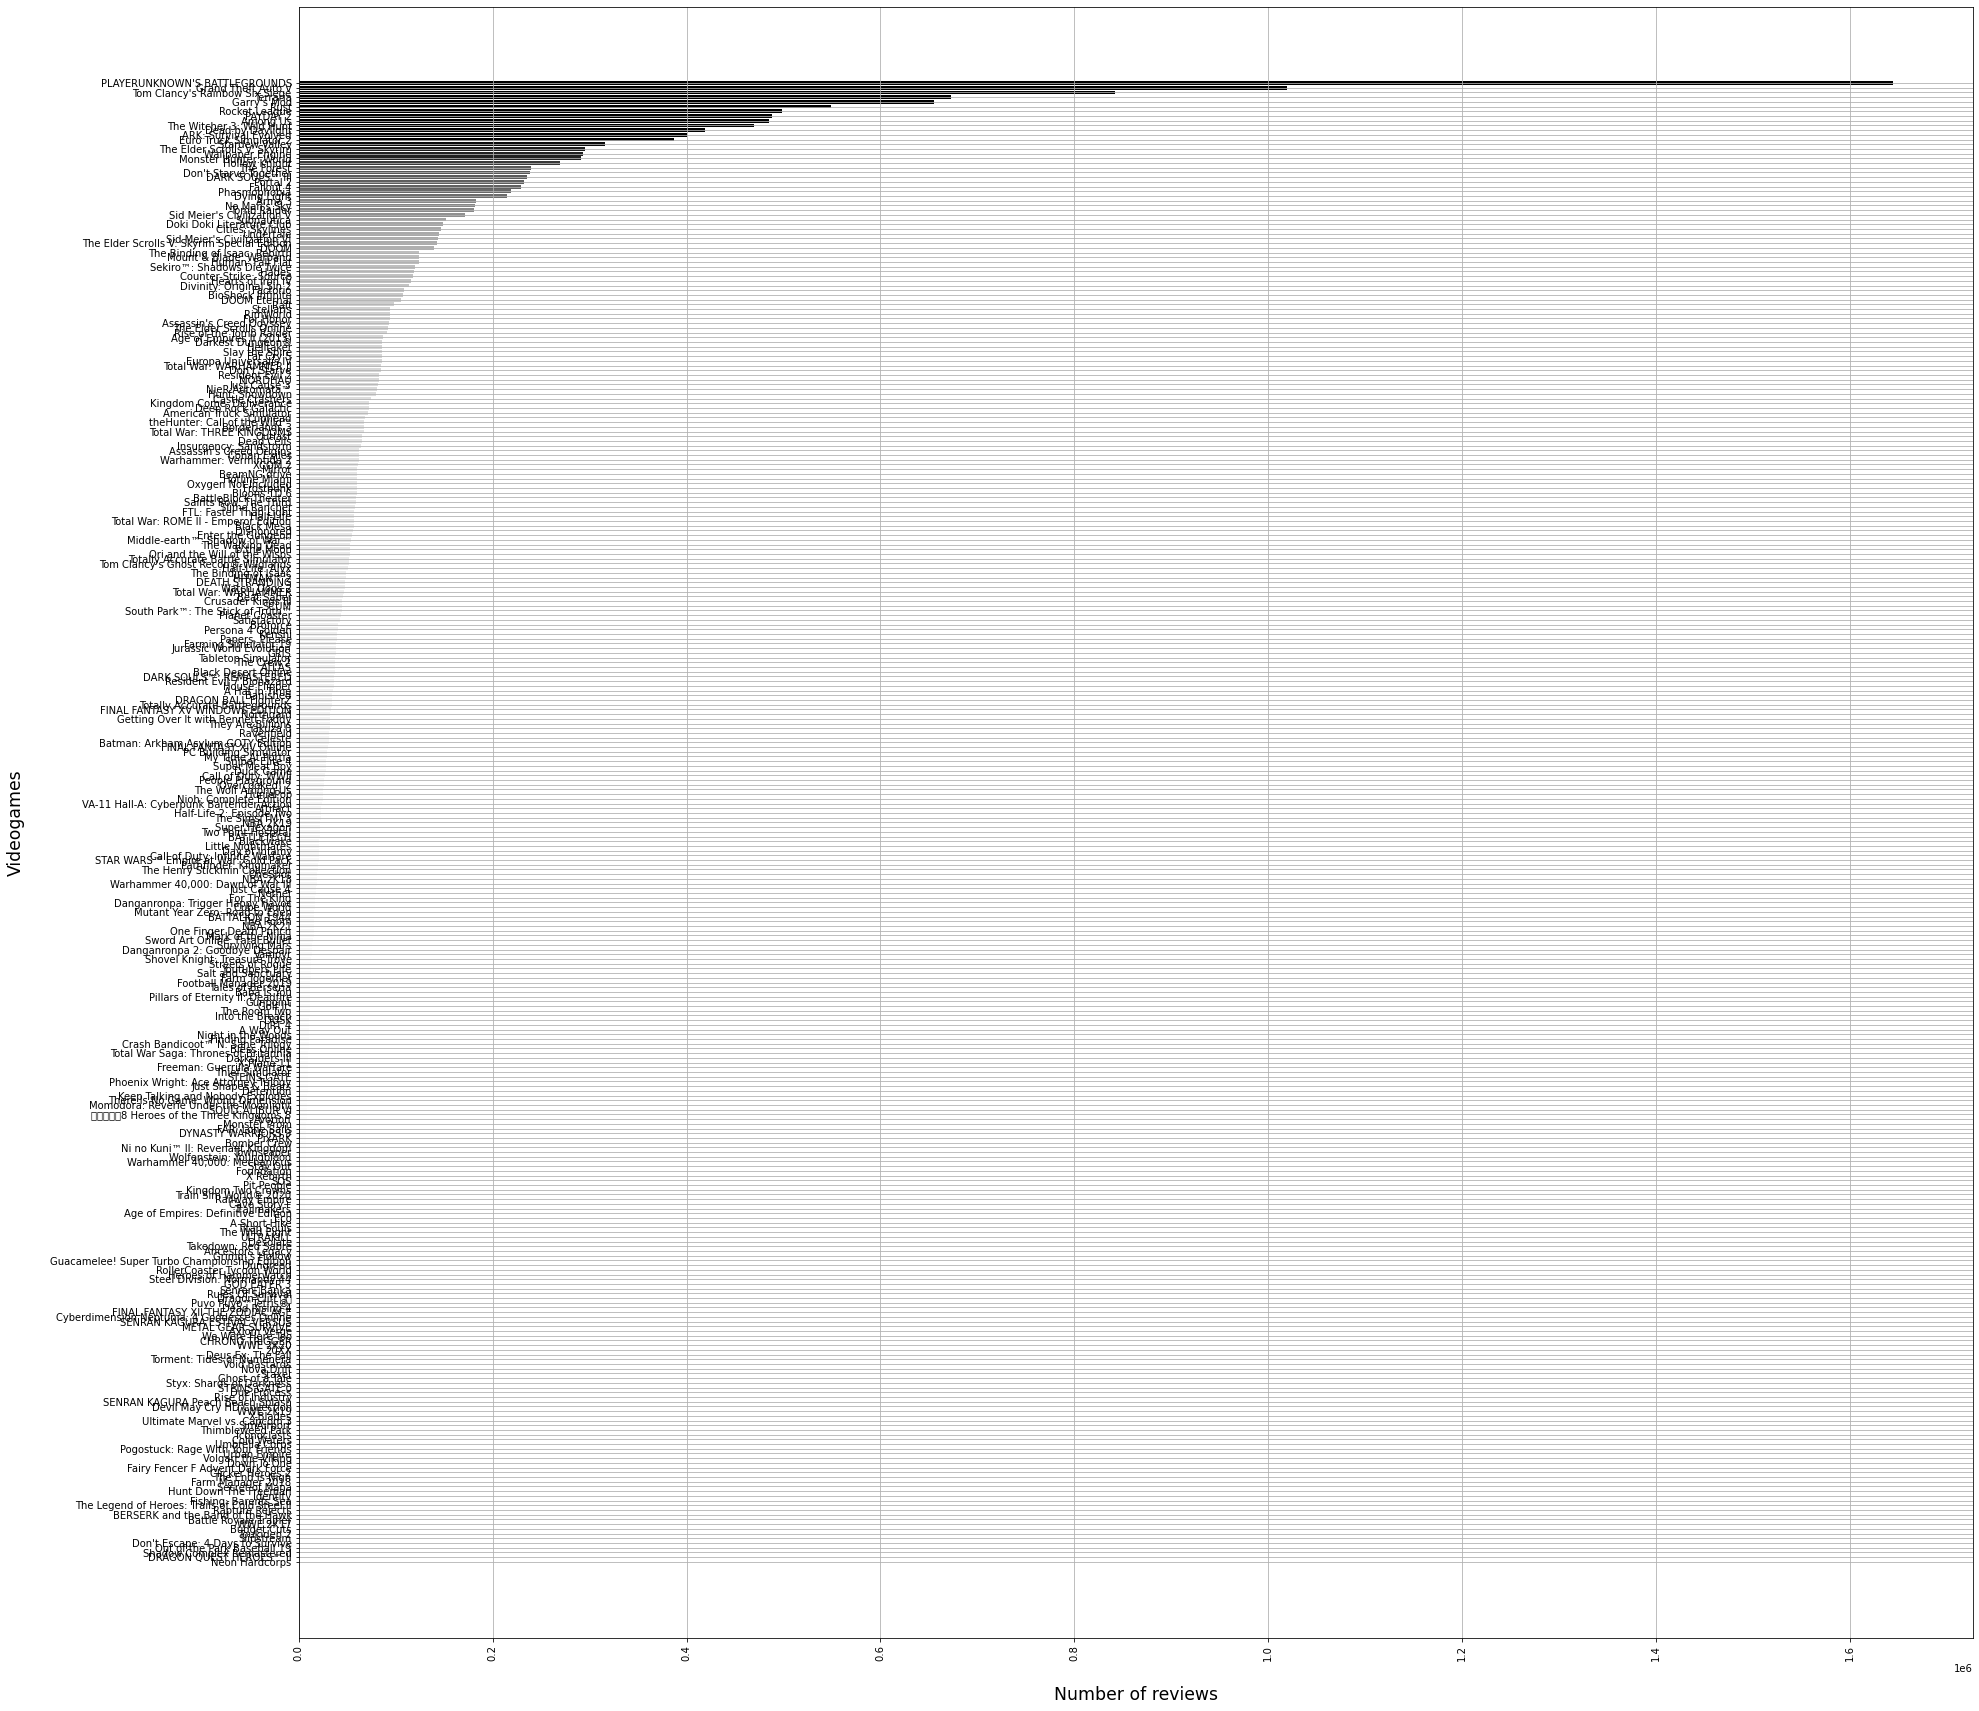

In [13]:
df.numbersOfReviewsByApplication()

.

- What applications have the best Weighted Vote Score?

    >  To answare at this question we created function that get a slice of the dataframe with the column `app_name` and `weighted_vote_score` and than group it by `app_name`. `scoreOfApps(n)` get just the max of each group and than sort the result. The result is a dataframe of `n` elements
   
    

.

In [14]:
df.scoreOfApps(20)

,weighted_vote_score
app_name,
Stardew Valley,0.995987
Divinity: Original Sin 2,0.995245
Subnautica,0.994453
Mirror,0.994038
Wallpaper Engine,0.993540
Terraria,0.992892
The Forest,0.992581
Monster Hunter: World,0.992500
The Elder Scrolls Online,0.992356


.

 - Which applications have the most and the least recommendations?
 - How many of these applications were purchased, and how many were given for free?
 
 
    > We decided to answare at both questions with `raccomendedApp_purchase_free(h, t)` function. This function get two parameters:
    >> `h` (integer): numbers of app with most recommendations
    >> 
    >>`t` (integer): numbers of app with least recommendations
    >
    >The funcion return a Dataframe that have at the top `h` rows the most recommended apps and the relative number of purchase and free, and at the last `t` rows the least recommended apps and the relative number of purchase and free

.

In [15]:
df.raccomendedApp_purchase_free(5, 5)

,recommended,received_for_free,steam_purchase
app_name,,,
PLAYERUNKNOWN'S BATTLEGROUNDS,886417,61443,1372721
Grand Theft Auto V,831311,38624,905288
Tom Clancy's Rainbow Six Siege,742397,36300,702505
Terraria,658741,20154,527762
Garry's Mod,632558,24765,551250
Out of the Park Baseball 19,594,11,650
Shadow Complex Remastered,587,21,280
Identity,439,40,513
DRAGON QUEST HEROES™ II,423,7,493


.

# RQ3



- What is the most common time that authors review an application? For example, authors usually write a review at 17:44.

     >The question that has been posed to us has no direct answer. To answer the latter, we initially plotted, with the function requested in the exercise, the number of reviews in time intervals per time slot (early morning, late morning, early afternoon, etc ...). In this first representation *(figure 1)* we noticed two maximums: the first in the early afternoon (from 12 to about 16) and the second in the late afternoon (from about 16 to 20). 
     >
     >We then plotted at one hour intervals *(figure 2)* and finally at one minute intervals in order to obtain the time (hours and minutes) in which the most reviews were made *(figure 3)*.


.

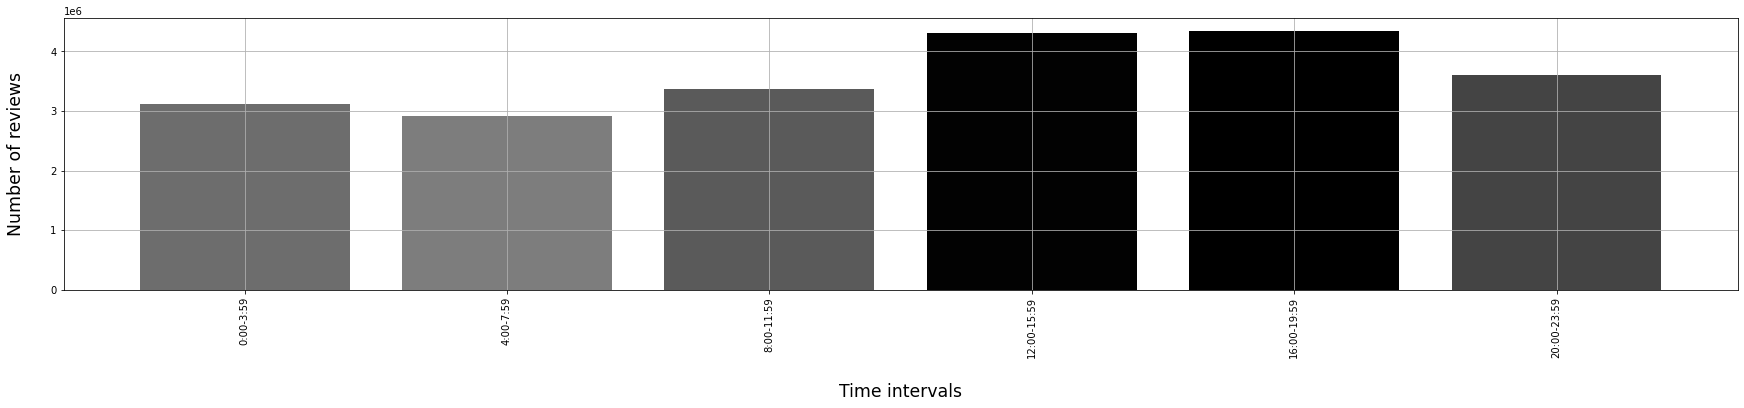

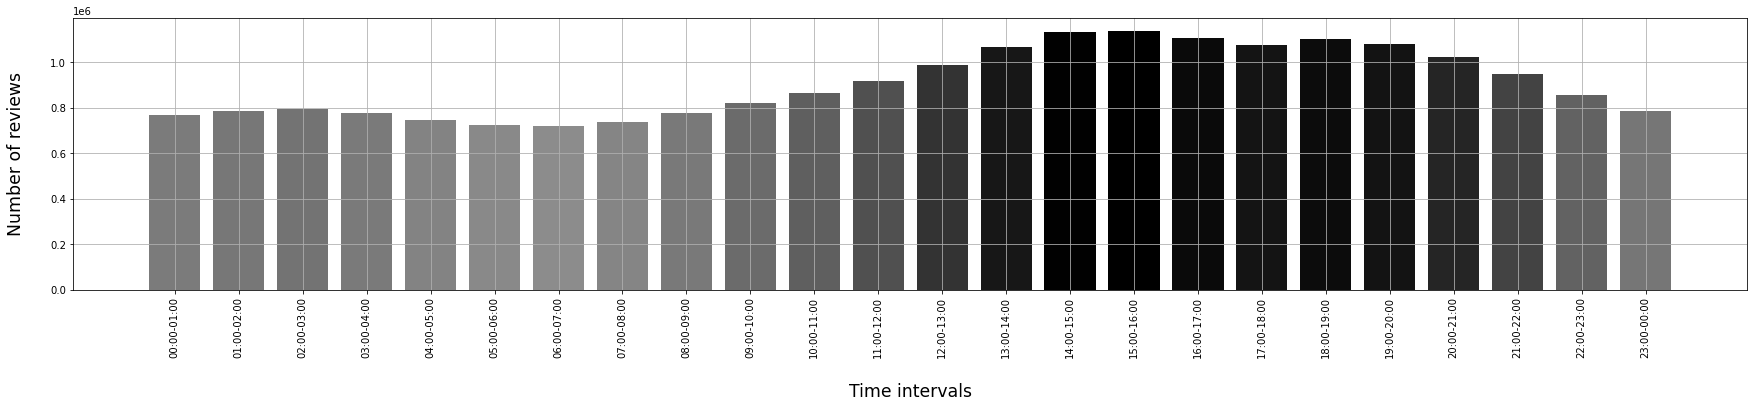

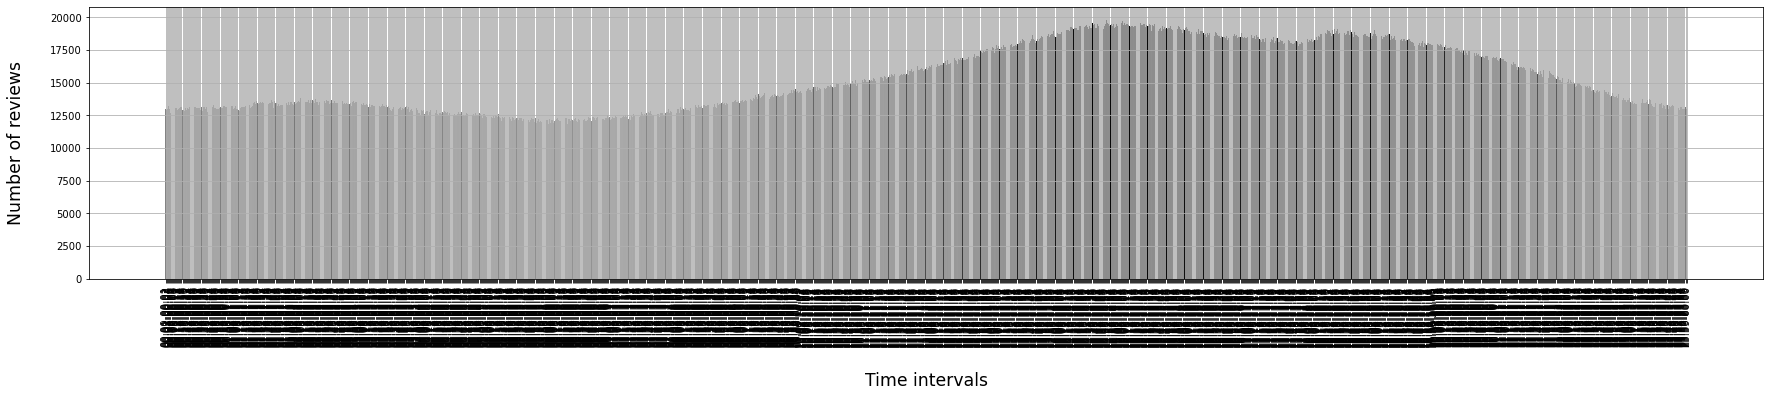

In [2]:
df.numbersOfReviewByTime([["0:00", "3:59"], ["4:00", "7:59"], ["8:00", "11:59"], ["12:00", "15:59"], ["16:00", "19:59"], ["20:00", "23:59"]]);
df.numbersOfReviewByTime(df.datetime_range24(delta = 60));
df.numbersOfReviewByTime(df.datetime_range24(delta = 1));

.

- Create a function that receives as a parameter a list of time intervals and returns the plot the number of reviews for each of the intervals.
- Use the function that you created in the previous literal to plot the number of reviews between the following time intervals:
    
| Initial time | Final time |
| ----------- | ----------- |
|06:00:00 | 10:59:59|
|11:00:00 | 13:59:59|
|14:00:00 | 16:59:59|
|17:00:00 | 19:59:59|
|20:00:00 | 23:59:59|
|00:00:00 | 02:59:59|
|03:00:00 | 05:59:59|


 > The function requested in this question had already been anticipated in the previous paragraph. It is the function with which we have plotted the various time intervals.
 >
 >Applying the given time intervals at the `numbersOfReviewByTime(intervals)` function we got this results:

.

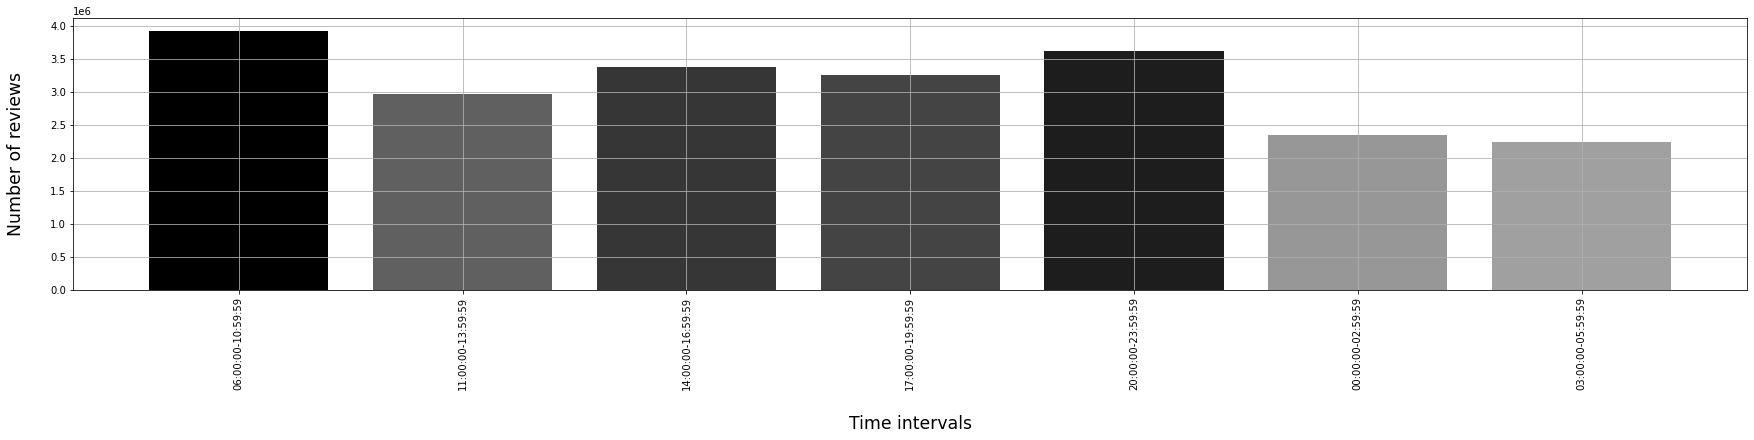

In [17]:
df.numbersOfReviewByTime([["06:00:00", "10:59:59"],["11:00:00", "13:59:59"], ["14:00:00",  "16:59:59"], ["17:00:00", "19:59:59"], ["20:00:00", "23:59:59"], ["00:00:00", "02:59:59"],["03:00:00", "05:59:59"]]);

# RQ4

In [18]:
df.reviewsByLanguage(3)

,language,review_id
5,english,9635437
20,schinese,3764967
19,russian,2348900


Il risultato di queste funzioni è lo stesso. Ovviamente se una recensione ha ricevuto alemno un voto funny, quasi certamente avrà ricevuto anche un voto helpful... Valutare meglio la richiesta

In [19]:
df.percentageOfFunny(6)

,votes_funny,tot reviews,percentage
language,,,
brazilian,78547,837524,0.093785
english,1085997,9635437,0.112709
german,90661,752596,0.120464
russian,391784,2348900,0.166795
schinese,444945,3764967,0.118180
spanish,82372,813320,0.101279


In [20]:
df.percentageOfHelpful(6)

,votes_helpful,tot reviews,percentage
language,,,
brazilian,78547,837524,0.093785
english,1085997,9635437,0.112709
german,90661,752596,0.120464
russian,391784,2348900,0.166795
schinese,444945,3764967,0.118180
spanish,82372,813320,0.101279


# RQ5

Due valori sono eccessivamente alti. Valutare se fare il count

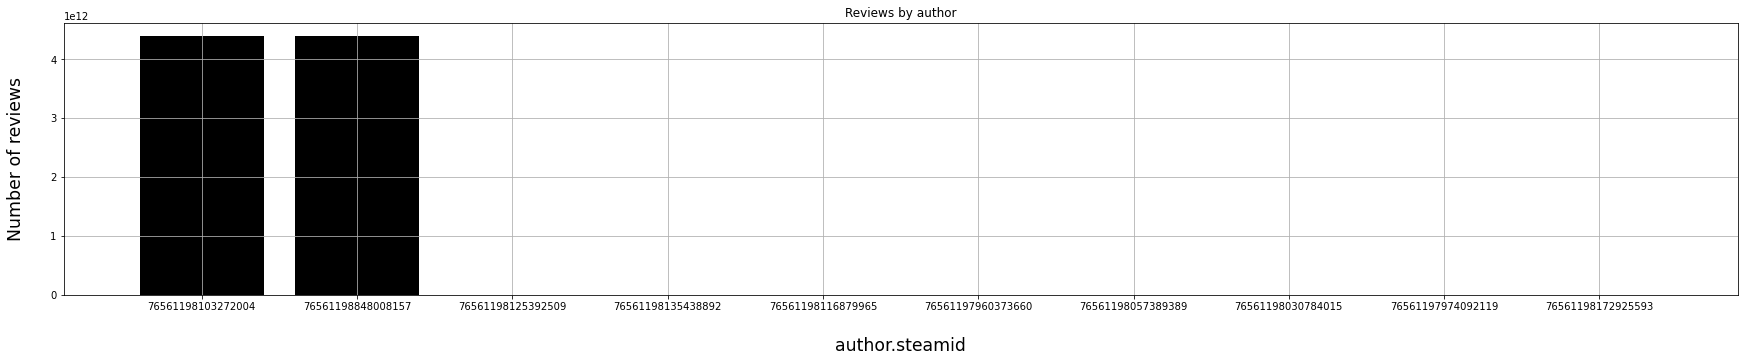

In [21]:
df.mostPopularReviewers_plot(10);

drop degli elementi errati

In [22]:
steam.drop(index=13093694, inplace=True)

In [23]:
steam.drop(index=5663041, inplace=True)

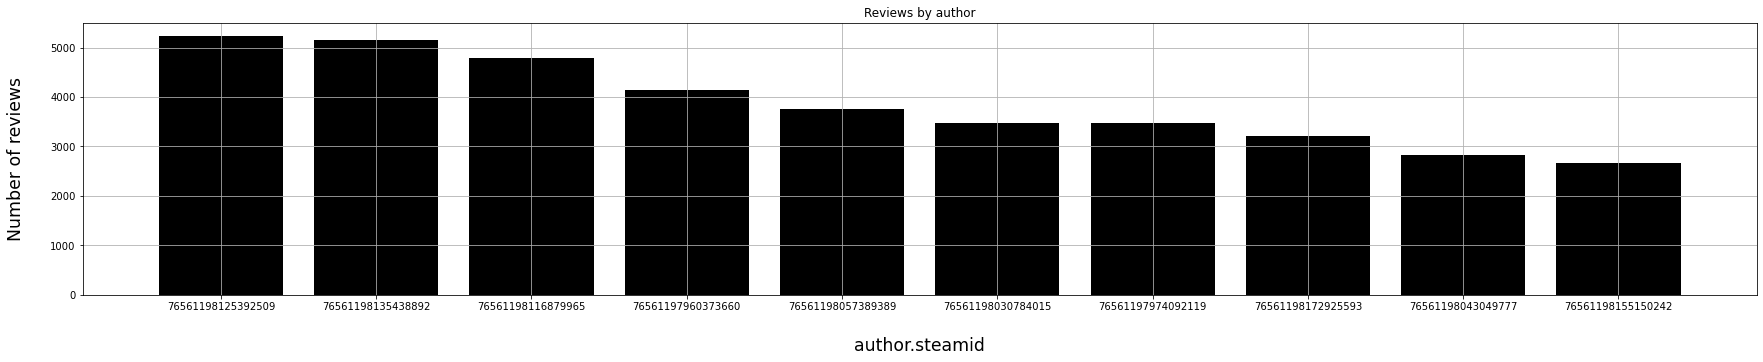

In [24]:
df.mostPopularReviewers_plot(10);

In [25]:
df.reviewedApplicationFromTheMostPopularReviewer()

504382                                         Half-Life
575674                            Counter-Strike: Source
656318                          Half-Life 2: Episode Two
1258197                                      Garry's Mod
3249032                                            ATLAS
3274520                                         Stay Out
3294251     Guacamelee! Super Turbo Championship Edition
7839830                                       Nova Drift
8067284                                        HITMAN™ 2
8853250                        Doki Doki Literature Club
12749457                                  Grimm's Hollow
20271637                                    Bless Online
20635080                                             SOS
20757736                              DYNASTY WARRIORS 9
20833712                                 FAR: Lone Sails
21187658                                    Just Cause 3
Name: app_name, dtype: object

pare che il nostro amico non avesse voglia di spuntare una casella...

In [26]:
df.percentageOfReceived()

,author.steamid,steam_purchase,received_for_free,percentage_of_purchase,percentage_of_free
4339408,76561198125392509,1,0,1.0,0.0


In [27]:
df.recommendedApp_purchasedAndFree()

,recommended,steam_purchase,received_for_free
0,True,1,0


# RQ6

 # Average time (days and minutes) a user lets pass before he updates a review

In [28]:
t = df.timedelta_updated_created()

Analizzando il DataFrame utilizzando la funzione "describe" si può reperire che la media

In [29]:
t.describe()["mean"]

Timedelta('36 days 03:33:10.752637156')

### NOTA

Analizzando i risultati della funzione describe si può inoltre notare la presenza di un dato errato nel dataset. Una riga del dataset possiede nel campo timestamp_created un valore maggiore rispetto al campo timestamp_updated.

In [30]:
t.sort_values()

19179653    -1 days +23:59:56
0             0 days 00:00:00
13184606      0 days 00:00:00
13184605      0 days 00:00:00
13184604      0 days 00:00:00
                  ...        
1561447    3710 days 12:51:16
3538178    7790 days 08:35:39
9287504    7794 days 00:01:21
10694933   7959 days 20:10:23
14636766   8069 days 20:08:16
Length: 21747369, dtype: timedelta64[ns]

   - Plot the top 3 authors that usually update their reviews.
   
Top 3 utenti con più recensioni aggiornate (Questa lista non prende in considerazione il numero totale di recensioni per utente: un utente con più recensioni si troverà probabilmente più in alto in classifica)

,Number of update
author.steamid,
76561198192166873,95
76561198206999976,61
76561198072450805,60


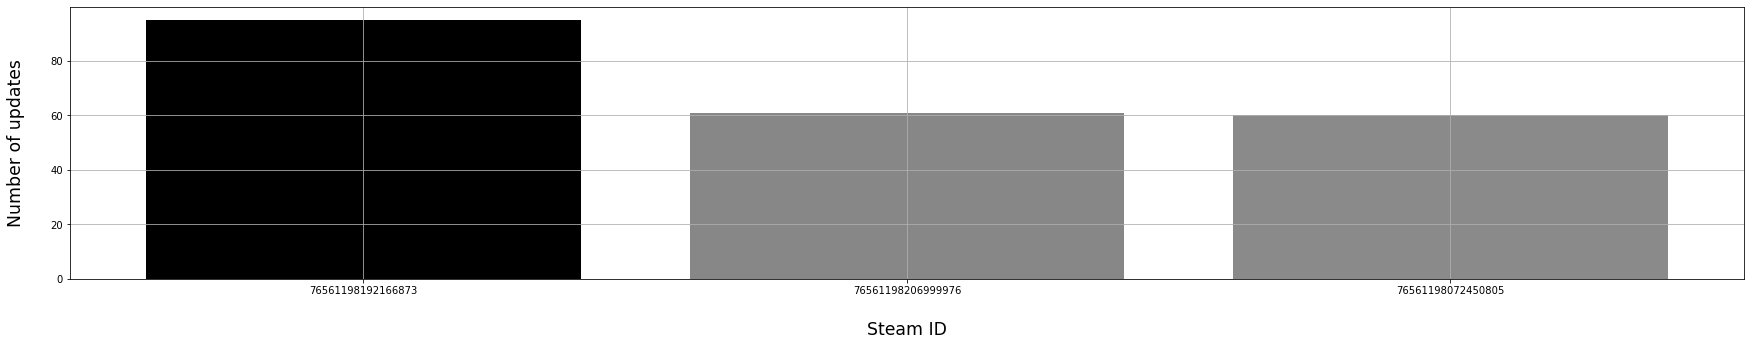

In [31]:
df.plotBestAuthor_updater(3)

Top 3 utenti con più recensioni aggiornate (Questa lista prende in considerazione il numero totale di recensioni e il numero di recensioni aggiornate)

In [32]:
df.numberOfUpdateAndNonUpdateByAuthor(3)

,TOT,Number of update,Number of not update,Update percentage
author.steamid,,,,
76561198072450805,60,60.0,NaN,100.0
76561197972642306,43,43.0,NaN,100.0
76561198006784126,35,35.0,NaN,100.0


# RQ7

In [33]:
df.probabilityQuestion1()

0.006444503700654548

In [34]:
df.probabilityQuestion2()

0.5605308077772737

In [35]:
df.probabilityQuestion3()

0.11969595034691323

# RQ8